<img src="TechLabs.png">

<h2>Please enter your full name here: Aleksandra Śledziewska</h2>


<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
data = datasets.load_breast_cancer()
print(np.shape(data.data))

(569, 30)


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [5]:
# create a data frame
d1 = pd.DataFrame(data.data, columns = data.feature_names)
d1['target'] = data.target
d1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# get basic statistics for all the variables
data = d1
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2809752410>,
      dtype=object)

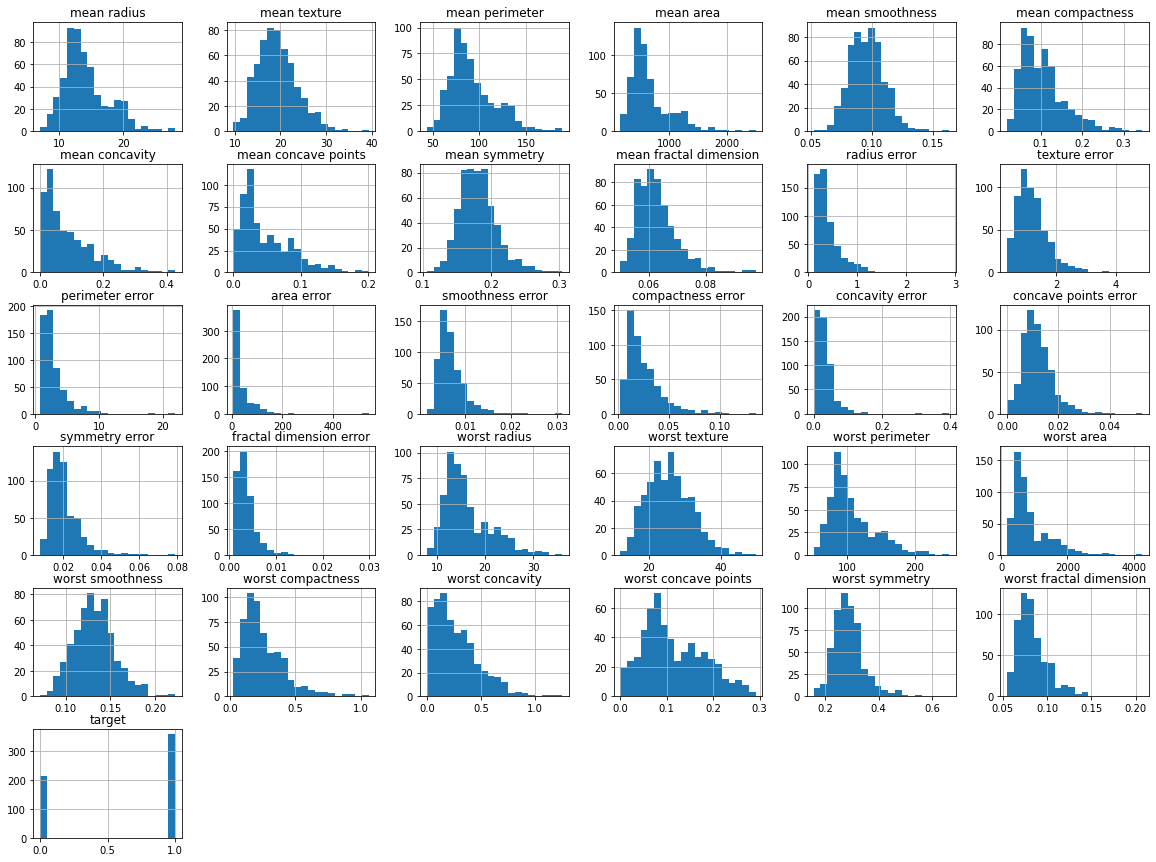

In [7]:
# plot histograms
d1.hist(figsize=(20,15), bins = 20)

In [8]:
# create new variables with percentage errors
# and include them in the model instead of absolute errors (which don't provide any information)

d1['radius error_p'] = d1['radius error']/d1['mean radius']
d1['texture error_p'] = d1['texture error']/d1['mean texture']
d1['perimeter error_p'] = d1['perimeter error']/d1['mean perimeter']
d1['area error_p'] = d1['area error']/d1['mean area']
d1['smoothness error_p'] = d1['smoothness error']/d1['mean smoothness']
d1['compactness error_p'] = d1['compactness error']/d1['mean compactness']
d1['concavity error_p'] = d1['concavity error']/d1['mean concavity']
d1['concave points error_p'] = d1['concave points error']/d1['mean concave points']
d1['symmetry error_p'] = d1['symmetry error']/d1['mean symmetry']
d1['fractal dimension error_p'] = d1['fractal dimension error']/d1['mean fractal dimension']

In [9]:
# create new variables showing the ratio of mean value to the worst value
# (probably it would provide more information than just new mean value)
# worst values remain as the only absolute values (in tests they gave the highest accuracy themselves)

d1['mean radius_p'] = d1['mean radius']/d1['worst radius']
d1['mean texture_p'] = d1['mean texture']/d1['worst texture']
d1['mean perimeter_p'] = d1['mean perimeter']/d1['worst perimeter']
d1['mean area_p'] = d1['mean area']/d1['worst area']
d1['mean smoothness_p'] = d1['mean smoothness']/d1['worst smoothness']
d1['mean compactness_p'] = d1['mean compactness']/d1['worst compactness']
d1['mean concavity_p'] = d1['mean concavity']/d1['worst concavity']
d1['mean concave points_p'] = d1['mean concave points']/d1['worst concave points']
d1['mean symmetry_p'] = d1['mean symmetry']/d1['worst symmetry']
d1['mean fractal dimension_p'] = d1['mean fractal dimension']/d1['worst fractal dimension']

In [10]:
# fill missing values for 0s
d1.fillna(value=0, inplace=True)

In [11]:
d1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,radius error_p,texture error_p,perimeter error_p,area error_p,smoothness error_p,compactness error_p,concavity error_p,concave points error_p,symmetry error_p,fractal dimension error_p,mean radius_p,mean texture_p,mean perimeter_p,mean area_p,mean smoothness_p,mean compactness_p,mean concavity_p,mean concave points_p,mean symmetry_p,mean fractal dimension_p
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0.060867,0.087216,0.069943,0.153247,0.054046,0.176657,0.179040,0.107886,0.124142,0.078681,0.708826,0.598961,0.665222,0.495790,0.729963,0.417067,0.421548,0.554258,0.525755,0.661985
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,0.026422,0.041300,0.025568,0.055867,0.061659,0.166328,0.214039,0.190965,0.076656,0.062326,0.823129,0.759077,0.836902,0.677914,0.684491,0.421436,0.359685,0.377258,0.658909,0.636599
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,0.037867,0.037031,0.035269,0.078163,0.056113,0.250532,0.194124,0.160907,0.108748,0.076196,0.835384,0.832354,0.852459,0.703920,0.759003,0.376678,0.438277,0.526337,0.572654,0.684974
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0.043398,0.056722,0.044406,0.070526,0.063930,0.262698,0.234507,0.177471,0.229611,0.094499,0.765929,0.769057,0.784667,0.680113,0.679218,0.327716,0.351434,0.408544,0.391232,0.563237
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0.037319,0.054484,0.040252,0.072814,0.114556,0.185316,0.287273,0.180729,0.097070,0.086945,0.900177,0.860228,0.887648,0.823492,0.729985,0.647805,0.495000,0.641846,0.765228,0.766215


In [12]:
# separate input and output sets
array = d1.values
X_1 = array[:,20:30]
X_2 = array[:,31:]
X = np.concatenate([X_1, X_2], axis=1)
Y = array[:,30]

In [13]:
# normalize the data (needed for neural network)
from sklearn import preprocessing 

sc = preprocessing.StandardScaler()
X_std = sc.fit_transform(X)

In [14]:
# split the dataset into train and test sets (70/30)

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 10

X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=test_size, random_state=seed)

In [15]:
# logistic regression

from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver='liblinear', C=1.0)
# l2 regularization by default
# C=1.0 (default) -> changing it hasn't improved the performance)
# balanced -> adjust weights proportionally to class frequencies
model.fit(X_train, Y_train)

# Check the accuracy on test data
result = model.score(X_test, Y_test)

print(f'\nAccuracy {result*100:5.3f}')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy 98.246


In [16]:
# Check other performance metrics

from sklearn.metrics import confusion_matrix

Y_predicted = model.predict(X_test)

c_matrix=confusion_matrix(Y_test, Y_predicted)

print("Confusion Matrix")
print(c_matrix)
# 3 observations missclassified -> only malignant patients 

Confusion Matrix
[[ 59   0]
 [  3 109]]


In [17]:
# Try with k-fold (more stable results)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=10, random_state=10, shuffle=True)

model=LogisticRegression(solver="liblinear")

results=cross_val_score(model, X_std, Y, cv=kfold)

print(f'Logistic Regression - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

Logistic Regression - Accuracy 97.534% std 2.390991


# Print the logit accuracy below:

In [18]:
logitacc = "98.246"
print(f"\nTesting set accuracy with logit is: {logitacc}")


Testing set accuracy with logit is: 98.246


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

In [19]:
import pickle
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

In [20]:
# Build a neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(30, input_dim=30, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
7/7 [==============================] - 3s 4ms/step - loss: 0.4022 - accuracy: 0.8317
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.1213 - accuracy: 0.9598
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9749
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0439 - accuracy: 0.9874
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.9824
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9899
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9899
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9899
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9950


In [23]:
model.evaluate(X_test, Y_test, batch_size=64)

3/3 [==============================] - 0s 5ms/step - loss: 0.0958 - accuracy: 0.9649


[0.09580010175704956, 0.9649122953414917]

In [24]:
ANNacc = "97.66"
print(f"\nTesting set accuracy with ANN is: {ANNacc}")


Testing set accuracy with ANN is: 97.66


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.

In [25]:
'''
The neural network behaves similarly to logistic regression, but I would
choose to implement logistic regression, as it is slightly more accurate on
test set, and it is much more interpretable.

The neural network may give worse results, because the dataset is very small. 
Meanwhile, neural networks require huge datasets to first train the model and learn.
If the neural network was pretrained on some other big dataset concerning breast cancer,
probably it would give more accurate results.

On the other hand, logistic regression can be easily applied to smaller datasets.
'''

'\nThe neural network behaves similarly to logistic regression, but I would\nchoose to implement logistic regression, as it is slightly more accurate on\ntest set, and it is much more interpretable.\n\nThe neural network may give worse results, because the dataset is very small. \nMeanwhile, neural networks require huge datasets to first train the model and learn.\nIf the neural network was pretrained on some other big dataset concerning breast cancer,\nprobably it would give more accurate results.\n\nOn the other hand, logistic regression can be easily applied to smaller datasets.\n'

# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

In [ ]:
# a formula found on the Internet
# dXt = µXtdt + σXtdT
# µ - drift
# σ - volatility
# T - student T distribution

In [ ]:
import random
from scipy.stats import t

N = 1000000
drift = 0.1
volatility = 0.2
price_today = 69
strikeprice = 96
df = 3  # degrees of freedom

def calculate_price():
  change = random.choice([1, -1])*drift*price_today + volatility*price_today*t.rvs(df, size=1)
  price = price_today + change
  return(price.item())

stockprice = []
for i in range(0,N):
  stockprice.append(calculate_price())

stockprice = np.asarray(stockprice)

#callpayoff = max(stockprice - strikeprice, 0)
callpayoff = stockprice - strikeprice
callpayoff[callpayoff<0] = 0.
print(f"\nMean payout: {callpayoff.mean()}")


Mean payout: 1.507858909030239


In [ ]:
'''
Mean payout: 1.51.

Mean payout is quite higher than 1€, so the boss can buy this option.
'''

'\nMean payout: 1.51.\n\nMean payout is quite higher than 1€, so the boss can buy this option.\n'

# Good luck!

Don't forget: google, github and stack overflow are your best friends!
